# PREDICTING STUDENT MARKS

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [15]:
df = pd.read_csv('DATA/Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<AxesSubplot: xlabel='time_study', ylabel='Marks'>

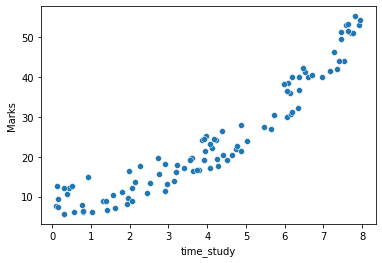

In [17]:
sns.scatterplot(data=df, x='time_study', y='Marks')

<AxesSubplot: xlabel='number_courses', ylabel='Marks'>

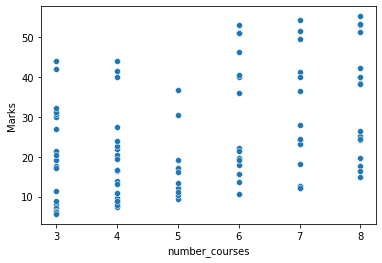

In [18]:
sns.scatterplot(data=df, x='number_courses', y='Marks')

#### Correlations ####

<AxesSubplot: >

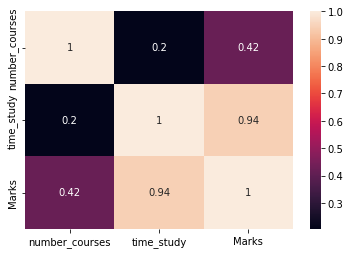

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
df.corr()['Marks']

number_courses    0.417335
time_study        0.942254
Marks             1.000000
Name: Marks, dtype: float64

### PREPARING THE DATA BEFORE THE TRAINING

In [21]:
X = df.drop('Marks', axis=1)
y = df['Marks']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### MODEL TRAINING

In [22]:
from sklearn.svm import SVR
model = SVR()
params = {'C':[0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0.01,0.5,1,2]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, params)
grid.fit(scaled_X_test, y_test)
grid.best_estimator_

SVR(C=1, degree=2, epsilon=1, kernel='linear')

#### PERFORMANCE EVALUATION

In [23]:
from sklearn.metrics import r2_score

##### TRAIN DATA

In [24]:
train_pred = grid.predict(scaled_X_train)
r2_score(y_train, train_pred)

0.9275001569914064

##### TEST DATA

In [25]:
test_pred = grid.predict(scaled_X_test)
r2_score(y_test, test_pred)

0.9467479271633563